In [1]:
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = yf.download('INFY.NS', start = '2010-01-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [3]:
log_returns = np.log(1+data.pct_change())
log_returns.tail()

Date
2022-08-22   -0.013522
2022-08-23   -0.021328
2022-08-24   -0.003182
2022-08-25   -0.012665
2022-08-26    0.002237
Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

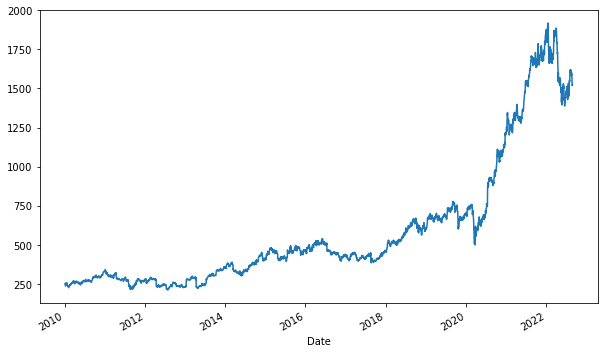

In [4]:
data.plot(figsize = (10,6))

<AxesSubplot:xlabel='Date'>

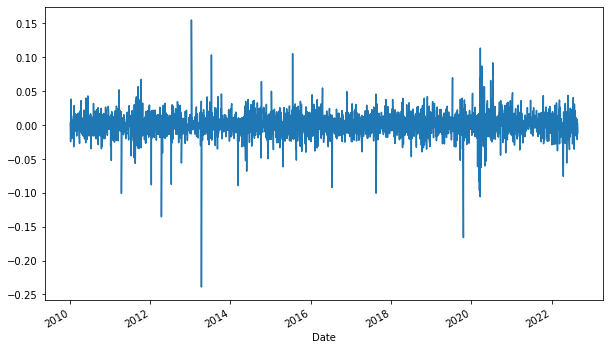

In [5]:
log_returns.plot(figsize =(10,6))

In [6]:
u = log_returns.mean()
var = log_returns.var()

In [7]:
drift = np.array(u -(0.5*var))
std = np.array(log_returns.std())

In [8]:
t_intervals = 250
iterations = 150

In [9]:
daily_returns = np.exp(drift + std * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[0.96679922, 0.96504464, 0.99628496, ..., 0.99752871, 1.00371757,
        1.01879111],
       [0.9951037 , 1.02550126, 0.99594734, ..., 0.9937355 , 1.0106125 ,
        1.01601763],
       [1.01831435, 1.0299406 , 0.9925946 , ..., 1.00265203, 0.99190706,
        0.96009083],
       ...,
       [1.01388104, 1.01025186, 0.9833099 , ..., 1.00082422, 1.00792659,
        1.00354748],
       [1.01002902, 0.97611188, 1.01789932, ..., 1.01140117, 0.99187057,
        1.02270767],
       [1.00587714, 1.01100397, 0.99753505, ..., 0.99560099, 1.00658792,
        0.99025769]])

In [10]:
Closing = data.iloc[-1]
Closing

1521.550048828125

In [11]:
sim = np.zeros_like(daily_returns) # zeroes like copies
sim

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
sim[0] = Closing
sim

array([[1521.55004883, 1521.55004883, 1521.55004883, ..., 1521.55004883,
        1521.55004883, 1521.55004883],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

In [13]:
for t in range(1, t_intervals):
    sim[t] = sim[t-1] * daily_returns[t]
sim

array([[1521.55004883, 1521.55004883, 1521.55004883, ..., 1521.55004883,
        1521.55004883, 1521.55004883],
       [1514.10008599, 1560.35148731, 1515.38372366, ..., 1512.01830518,
        1537.6975033 , 1545.92166878],
       [1541.82984229, 1607.06934584, 1504.1617035 , ..., 1516.0282244 ,
        1525.25301682, 1484.22521647],
       ...,
       [1446.06937124, 2450.76435004, 1702.80365022, ..., 1726.26190314,
        1400.35939136, 1911.99265152],
       [1460.57202391, 2392.22019713, 1733.28268287, ..., 1745.94330865,
        1388.97527212, 1955.4095527 ],
       [1469.1560169 , 2418.54411709, 1729.01023037, ..., 1738.26288068,
        1398.12572444, 1936.35934663]])

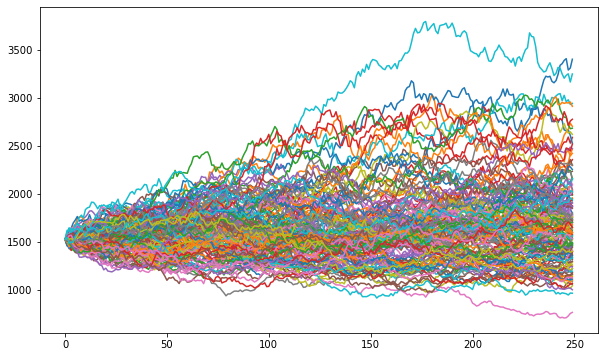

In [14]:
plt.figure(figsize = (10,6))
plt.plot(pd.DataFrame(sim))

In [15]:
a = sim[-1].max()
a

3398.6348410663586

In [16]:
b = sim[-1].min()
b

762.2120600288202

In [17]:
c = sim[-1].mean()
c

1718.7271505573979

In [18]:
x = ((sim[-1]/Closing)-1)*100

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

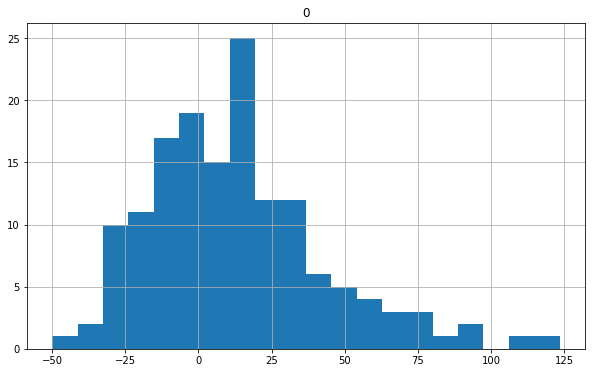

In [19]:
pd.DataFrame(x).hist(figsize =(10,6), bins = 20)